# Generating and analysis of random matrices

In [1]:
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [2]:
class RMT1():
    #RMT
    def __init__(self, n):
        self.N = n
        self.rmt = np.zeros((self.N , self.N))
    
    def URMT(self, x1, x2):
        for i in range(len(self.rmt)):
            for j in range(i, len(self.rmt[i])):
                self.rmt[i][j] = np.random.uniform(x1, x2)
                self.rmt[j][i] = self.rmt[i][j]

    def GRMT1(self, mu, sigma):
        for i in range(len(self.rmt)):
            for j in range(i, len(self.rmt[i])):
                self.rmt[i][j] = np.random.normal(mu, sigma)
                self.rmt[j][i] = self.rmt[i][j]

    def GRMT2(self, mud, sigmad, mu, sigma):
        for i in range(len(self.rmt)):
            for j in range(i, len(self.rmt[i])):
                self.rmt[i][j] = np.random.normal(mu, sigma)
                self.rmt[j][i] = self.rmt[i][j]
            self.rmt[i][i] = np.random.normal(mud, sigmad)
    

In [15]:
TestRMT = RMT1(6)
TestRMT.GRMT1(0, 1)
LA.eigvals(TestRMT.rmt)

array([-4.45955902,  2.15531746,  1.62529155,  0.7732595 , -0.59709229,
       -2.10593201])

In [27]:
myRMT = RMT1(100)
EN = 1000
eigVals = np.array([])
for i in range(EN):
    myRMT.GRMT1(0, 1)
    e = LA.eigvals(myRMT.rmt)
    eigVals = np.concatenate((eigVals, e), axis=None)

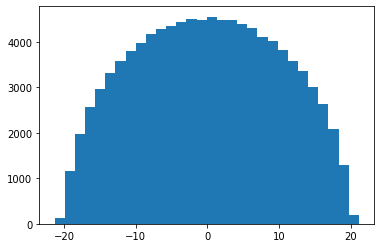

In [28]:
plt.hist(eigVals, bins=30)
plt.show()

In [21]:
import scipy.stats as stats

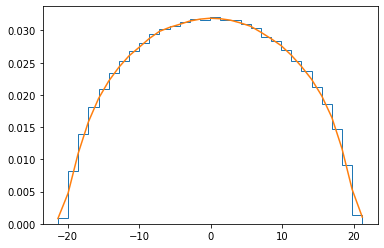

In [29]:
n, x, _ = plt.hist(eigVals, bins=30, histtype=u'step', density=True)
density = stats.gaussian_kde(eigVals)
plt.plot(x, density(x))
plt.show()

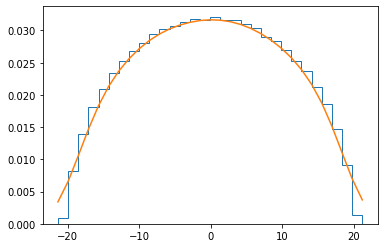

In [30]:
n, x, _ = plt.hist(eigVals, bins=30, histtype=u'step', density=True)
density = stats.gaussian_kde(eigVals)
density.covariance_factor = lambda : 0.25
density._compute_covariance()
plt.plot(x, density(x))
plt.show()

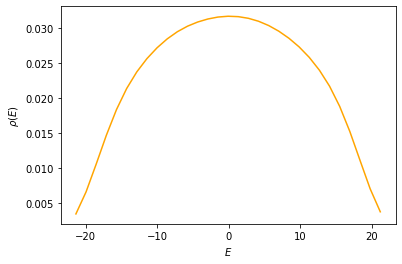

In [31]:
plt.plot(x, density(x), color='orange')
plt.xlabel("$E$")
plt.ylabel(r"$\rho(E)$")
plt.show()

In [33]:
x = []
eigValsMax = []
for j in range(50, 101, 10):
    x.append(j)
    myRMT = RMT1(j)
    EN = 100
    eig = 0
    for i in range(EN):
        myRMT.GRMT1(0, 1)
        e = LA.eigvals(myRMT.rmt)
        eig = eig + np.max(e)
    meig = eig/EN
    eigValsMax.append(meig)

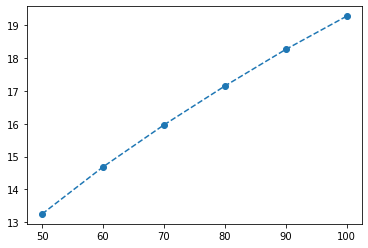

In [36]:
plt.plot(x, eigValsMax, linestyle="--", marker='o')
plt.show()